Ticketing and Travel Insights for Railway Services

----

**Background**:

A railway company, **RailConnect**, aims to enhance customer satisfaction and optimise operations by leveraging data insights. They want to address recurring customer complaints about delayed trains, high ticket prices, and inconvenient ticketing methods. Additionally, the company seeks to improve revenue by understanding travel patterns and creating targeted offers for passengers

**Key Challenges**

1.	**Travel Delays**: Passengers often face delays but lack clarity on their causes or compensation options. Delays affect customer loyalty.
2.	**Refund Processing**: Customers complain about long refund request processes and lack of clarity on the approval criteria.
3.	**Dynamic Pricing**: Ticket prices vary significantly based on booking time and class, leaving passengers confused about when to book.
4.	**Travel Pattern** Optimization: RailConnect lacks insights into peak travel times and popular routes, leading to overcrowding and operational inefficiencies.
5.	**Railcard Usage**: Railcards are underutilized, and the company seeks to encourage their adoption for targeted discounts.

**Goals**

1.	Provide real-time insights on delays, their causes, and compensation eligibility.
2.	Analyse ticket pricing trends to guide passengers on cost-effective booking times.
3.	Identify popular travel routes, stations, and time slots for better resource allocation.
4.	Encourage railcard adoption through data-backed marketing strategies.
5.	Streamline refund processes based on journey status and delay reasons.

----

In [7]:
# importing libraries 

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

---

Importing data 

In [10]:
# pulling data 

railway = pd.read_csv("/Users/glen/Desktop/python.2.0/resources/UK+Train+Rides/railway.csv")

In [11]:
# data overview 

railway.head(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,08/12/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,01/01/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,16/12/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,01/01/2024,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,19/12/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,02/01/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,20/12/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,01/01/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,27/12/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,01/01/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,30/12/2023,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,01/01/2024,06:15:00,08:05:00,08:05:00,On Time,NaN,No
6,1c74479d-85a4-4ba1-a607,31/12/2023,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,01/01/2024,22:30:00,23:40:00,23:40:00,On Time,NaN,No
7,febf8dab-f808-46fa-bf2b,31/12/2023,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,01/01/2024,00:00:00,00:30:00,00:30:00,On Time,NaN,No
8,01df916f-4291-41ec-a37d,31/12/2023,01:43:09,Station,Credit Card,NaN,Standard,Advance,37,London Euston,York,01/01/2024,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
9,a8cedba7-1923-459d-b046,31/12/2023,03:05:52,Online,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,01/01/2024,01:30:00,02:30:00,02:30:00,On Time,NaN,No


In [12]:
railway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [13]:
railway.dtypes

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

From the overview of this dataset, there are  a total of **18 columns** with **31653 rows** as this data set includes transactions( time and date of the purchase), payment method, tickets(type and class), journey times, etc. This dataset consists of different data types for each column, such as int and object( string, date, time, etc). This dataset holds travel insights from January to April 2024.

---

 Data Wrangling

This process would include cleaning and manipulating data in preparation for analysis and extracting insights. 

Cleaning data

In [19]:
# checking for null values 
railway.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

There are a few null values in the dataset's **3 columns**; **railcard**, **actual arrival time**, and **reason for delay**. However, these null values don't impact the dataset.
For instance, there is missing data in **actual arrival time** because some trains may have been cancelled. 

In [21]:
# checking for duplicated values

railway.duplicated().sum()

0

There isn't any duplicated values within the dataset.

Data Manipulation 

To find and extract better insights within the dataset, the dataset would be manipulated by adding a few new columns to help get a better understanding of the dataset and fulfil the objectives of this project.

In [25]:
# chaning data types from object to datetime 
railway['Date of Journey'] = pd.to_datetime(railway['Date of Journey'], format='%d/%m/%Y')

In [26]:
railway['Month'] = railway['Date of Journey'].dt.month_name()

In [27]:
railway['Reason for Delay'] = railway['Reason for Delay'].fillna('None')
railway['Railcard'] = railway['Railcard'].fillna('None')
# actual arrival time

In [28]:
railway.isnull().sum()

Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
Month                     0
dtype: int64

In [29]:
railway['Reason for Delay'] = railway['Reason for Delay'].replace(
    ({'Signal failure' : 'Signal Failure',
      'Weather' : 'Weather Conditions',
      'Staffing' : 'Staff Shortage'})
                                                                 )

----

**Analysing Data**

In [32]:
no_delay_railway = railway[~(railway['Reason for Delay'] == 'None')]

In [33]:
no_delay_railway.head(2)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Month
1,b0cdd1b0-f214-4197-be53,16/12/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,January
8,01df916f-4291-41ec-a37d,31/12/2023,01:43:09,Station,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No,January


In [34]:
# How many customers use railcards and what type of railcards are used 
pd.pivot_table(railway,
               index = 'Railcard',
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total  Railcard'
               )


,Transaction ID
Railcard,
Adult,4846
Disabled,3089
None,20918
Senior,2800
Total Railcard,31653


In [35]:
without_on_time = railway[~(railway['Journey Status'] == 'On Time')]

In [36]:
# Type of purchases used in purchasing tickets and where they were purchased 
pd.pivot_table(railway,
               index = 'Purchase Type',
               values = 'Transaction ID',
               columns = 'Payment Method',
               aggfunc = 'count',
               margins = True,
               margins_name = "Total Transaction Activities"
              )


Payment Method,Contactless,Credit Card,Debit Card,Total Transaction Activities
Purchase Type,,,,
Online,6390,11487,644,18521
Station,4444,7649,1039,13132
Total Transaction Activities,10834,19136,1683,31653


In [37]:
# What type of tickets type and class did customers get to travel
pd.pivot_table(railway,
               index = 'Ticket Class',
               values = 'Transaction ID',
               columns = 'Ticket Type',
               aggfunc = 'count',
               margins = True,
               margins_name = "Total Ticket Class"
              )

Ticket Type,Advance,Anytime,Off-Peak,Total Ticket Class
Ticket Class,,,,
First Class,1764,490,804,3058
Standard,15797,4850,7948,28595
Total Ticket Class,17561,5340,8752,31653


In [38]:
# Total profit from ticket type and class
pd.pivot_table(railway,
               index = 'Ticket Class',
               values = 'Price',
               columns = 'Ticket Type',
               aggfunc = 'sum',
               fill_value = 0,
               margins = True,
               margins_name = 'Total Revenue'
              )
               

Ticket Type,Advance,Anytime,Off-Peak,Total Revenue
Ticket Class,,,,
First Class,66886,37841,44672,149399
Standard,242388,171468,178666,592522
Total Revenue,309274,209309,223338,741921


In [39]:
# Customers Train Departure 
pd.pivot_table(railway,
               index = 'Departure Station', 
               values = 'Transaction ID',
               aggfunc = 'count'
              )



,Transaction ID
Departure Station,
Birmingham New Street,2136
Bristol Temple Meads,16
Edinburgh Waverley,51
Liverpool Lime Street,4561
London Euston,4954
London Kings Cross,4229
London Paddington,4500
London St Pancras,3891
Manchester Piccadilly,5650


In [40]:
pd.pivot_table(railway,
               index = 'Arrival Destination', 
               values = 'Transaction ID',
               columns = 'Departure Station',
               aggfunc = 'count',
               fill_value = 0,
               margins = True
              )

Departure Station,Birmingham New Street,Bristol Temple Meads,Edinburgh Waverley,Liverpool Lime Street,London Euston,London Kings Cross,London Paddington,London St Pancras,Manchester Piccadilly,Oxford,Reading,York,All
Arrival Destination,,,,,,,,,,,,,
Birmingham New Street,0,0,0,14,4209,0,0,3471,0,0,32,16,7742
Bristol Temple Meads,0,0,0,0,0,0,0,0,0,144,0,0,144
Cardiff Central,0,16,0,0,0,0,0,0,0,0,0,0,16
Coventry,65,0,0,0,0,0,0,0,0,0,0,0,65
Crewe,0,0,0,193,0,0,0,0,0,0,0,0,193
Didcot,0,0,0,0,0,0,0,0,0,0,48,0,48
Doncaster,0,0,0,0,0,0,0,0,0,0,0,211,211
Durham,0,0,0,0,0,0,0,0,0,0,0,258,258
Edinburgh,16,0,0,0,0,0,0,0,0,0,0,138,154


In [41]:
#Reason for Delay in Departure Station 

pd.pivot_table(no_delay_railway,
               index = 'Departure Station',
               values = 'Transaction ID',
               columns = 'Reason for Delay',
               aggfunc = 'count',
               fill_value = 0,
               margins = True
              )
# failure and weather                

Reason for Delay,Signal Failure,Staff Shortage,Technical Issue,Traffic,Weather Conditions,All
Departure Station,,,,,,
Birmingham New Street,24,56,108,3,77,268
Edinburgh Waverley,0,51,0,0,0,51
Liverpool Lime Street,98,122,247,73,594,1134
London Euston,219,77,43,29,147,515
London Kings Cross,146,32,69,34,58,339
London Paddington,74,139,82,46,82,423
London St Pancras,111,49,40,31,59,290
Manchester Piccadilly,251,224,105,87,320,987
Oxford,16,0,2,1,2,21


In [42]:
# Refund requested based on reasons for delays
pd.pivot_table(no_delay_railway, 
               index = 'Reason for Delay',
               values = 'Transaction ID',
               columns = 'Refund Request',
               aggfunc = 'count',
               fill_value = 0,
              )


Refund Request,No,Yes
Reason for Delay,,
Signal Failure,755,215
Staff Shortage,548,261
Technical Issue,319,388
Traffic,193,121
Weather Conditions,1239,133


In [43]:
# Journey status vs Refund request
pd.pivot_table (without_on_time,
                index = 'Journey Status',
                values = 'Transaction ID',
                columns = 'Refund Request',
                aggfunc = 'count',
                fill_value = 0,
                margins = True,
                margins_name = 'Total'
               )

Refund Request,No,Yes,Total
Journey Status,,,
Cancelled,1308,572,1880
Delayed,1746,546,2292
Total,3054,1118,4172


In [44]:
# Reasons for delay over time.

pd.pivot_table ( no_delay_railway,
                index = 'Reason for Delay',
                values = 'Transaction ID',
                columns = 'Month',
                aggfunc = 'count',
                fill_value = 0,
                margins = True,
                margins_name = 'Total'
               )


Month,April,February,January,March,Total
Reason for Delay,,,,,
Signal Failure,262,192,227,289,970
Staff Shortage,174,177,243,215,809
Technical Issue,161,171,164,211,707
Traffic,82,75,63,94,314
Weather Conditions,329,378,337,328,1372
Total,1008,993,1034,1137,4172


----

**Data Visualisation**

Visualising insights based on what was found on pivot table.

---

Visual One 

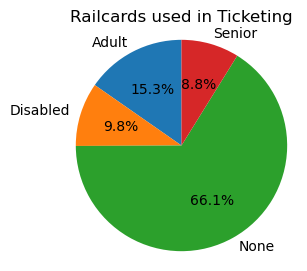

In [50]:
# how many customers use railcards and what type of railcards are used 
v1 = pd.pivot_table(railway,
               index = 'Railcard',
               values = 'Transaction ID',
               aggfunc = 'count'
               )
# extracting values and labels 
values = v1['Transaction ID']
labels = v1.index

# creating pie chart 
plt.figure(figsize = (3,3))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90)

# chart details
plt.title('Railcards used in Ticketing')
plt.axis('equal')
plt.show()


The data shows that **33.9% of customers use a railcard** when purchasing a train ticket, while **66.1% of customers pay full price** without a discount.

-	The **Adult Railcard** is the most used, accounting for 15% of all purchases.

-	The **Disabled Railcard** follows at **9.8%**, while the **Senior Railcard** is used by **8.8%** of customers.

This means the **Adult Railcard is 1.5 times more popular than the Disabled Railcard and nearly twice as common as the Senior Railcard**.


Visual Two

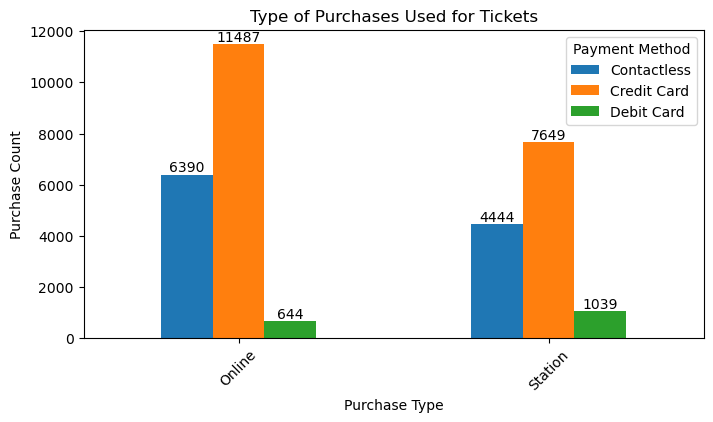

In [53]:
# type of purchases used in purchasing tickets and where they were purchased 
v2 = pd.pivot_table(railway,
               index = 'Purchase Type',
               values = 'Transaction ID',
               columns = 'Payment Method',
               aggfunc = 'count'
              )

# creating bar chart
v2_1 = v2.plot(kind = 'bar', figsize = (8,4))

# adding a number to each bar
for container in v2_1.containers:
    v2_1.bar_label(container, fmt = '%d') 

# chart details 
plt.title('Type of Purchases Used for Tickets')
plt.ylabel('Purchase Count')
plt.xlabel('Purchase Type')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()

The data indicates that the majority of customers prefer to purchase their tickets **online (18,521 transactions)** rather than at the **station (13,132 transactions)**.

**Payment Method Breakdown**:

1. **Credit Card – Most Used Payment Method**
- A total of **19,136** customers used credit cards.
- **Online: 11,487** transactions.
- **At the station: 7,649** transactions.
 
2. **Contactless – Second Most Popular Payment Method**
- A total of **10,834** transactions were made using contactless payments.
- **Online: 6,390** transactions.
- **At the station: 4,444** transactions.

3. **Debit Card – Least Used Payment Method**
- A total of **1,683 transactions** were made using debit cards.
- **Online: 644** transactions.
- **At the station: 1,039** transactions.

Visual Three

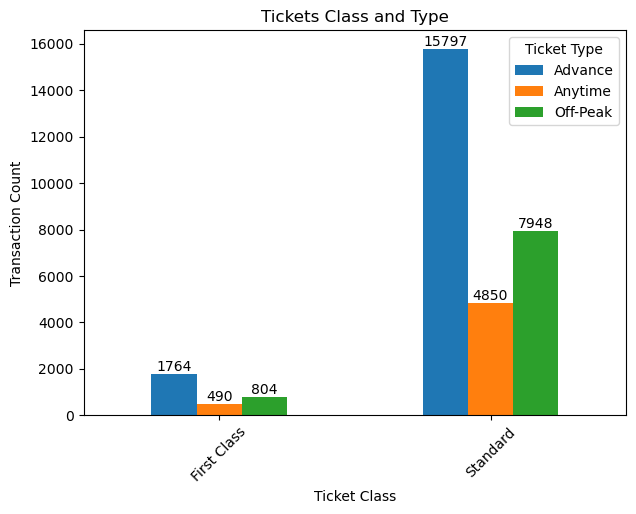

In [56]:
# what type of tickets type and class did customers get to travel
v3 = pd.pivot_table(railway,
               index = 'Ticket Class',
               values = 'Transaction ID',
               columns = 'Ticket Type',
               aggfunc = 'count',
               fill_value = 0     
              ) 

# creating bar chart
v3_1 = v3.plot(kind = 'bar', figsize = (7,5))

# adding a number to each bar
for container in v3_1.containers:
    v3_1.bar_label(container, fmt = '%d') 

# chart details 
plt.title('Tickets Class and Type')
plt.ylabel('Transaction Count')
plt.xlabel('Ticket Class')
plt.xticks(rotation=45)
plt.legend(title='Ticket Type')
plt.show()

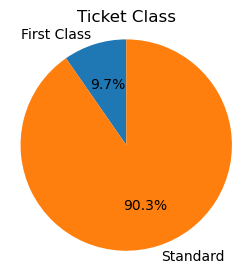

In [57]:
v3_2 = pd.pivot_table(railway,
               index = 'Ticket Class',
               values = 'Transaction ID',
               aggfunc = 'count'
              )

# extracting values and labels 
values = v3_2['Transaction ID']
labels = v3_2.index

# creating pie chart 
plt.figure(figsize = (3,3))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90)

# chart details
plt.title('Ticket Class')
plt.axis('equal')
plt.show()

The data indicates a strong preference for **standard class tickets, with 90.3% (28,585 customers)** choosing standard over **9.7% (3,058 customers) selecting first class**.

**Ticket Type Breakdown & Trends:**
1. **Advance Tickets** – Most Purchased **(61.4% of total tickets)**
- **Total sold: 17,561**
- **Standard: 15,797 (89.9%**) | **First Class: 1,764 (10.1%)**
- **Insight:** Advance tickets dominate, likely due to lower prices and early booking incentives.

2. **Off-Peak Tickets** – Second Most Purchased **(30.6%)**
- **Total sold: 8,752**
- **Standard: 7,948 (90.8%)** | **First Class: 804 (9.2%)**
- **Insight:** Popular among flexible travellers seeking lower fares outside peak hours.
  
3. **Anytime Tickets**  – **Least Purchased (18.7%)**
- **Total sold: 5,340**
- **Standard: 4,850 (90.9%)** | **First Class: 490 (9.1%)**
- **Insight:** Higher prices may deter purchases, leading to lower demand compared to Advance or Off-Peak options.



Visual Four

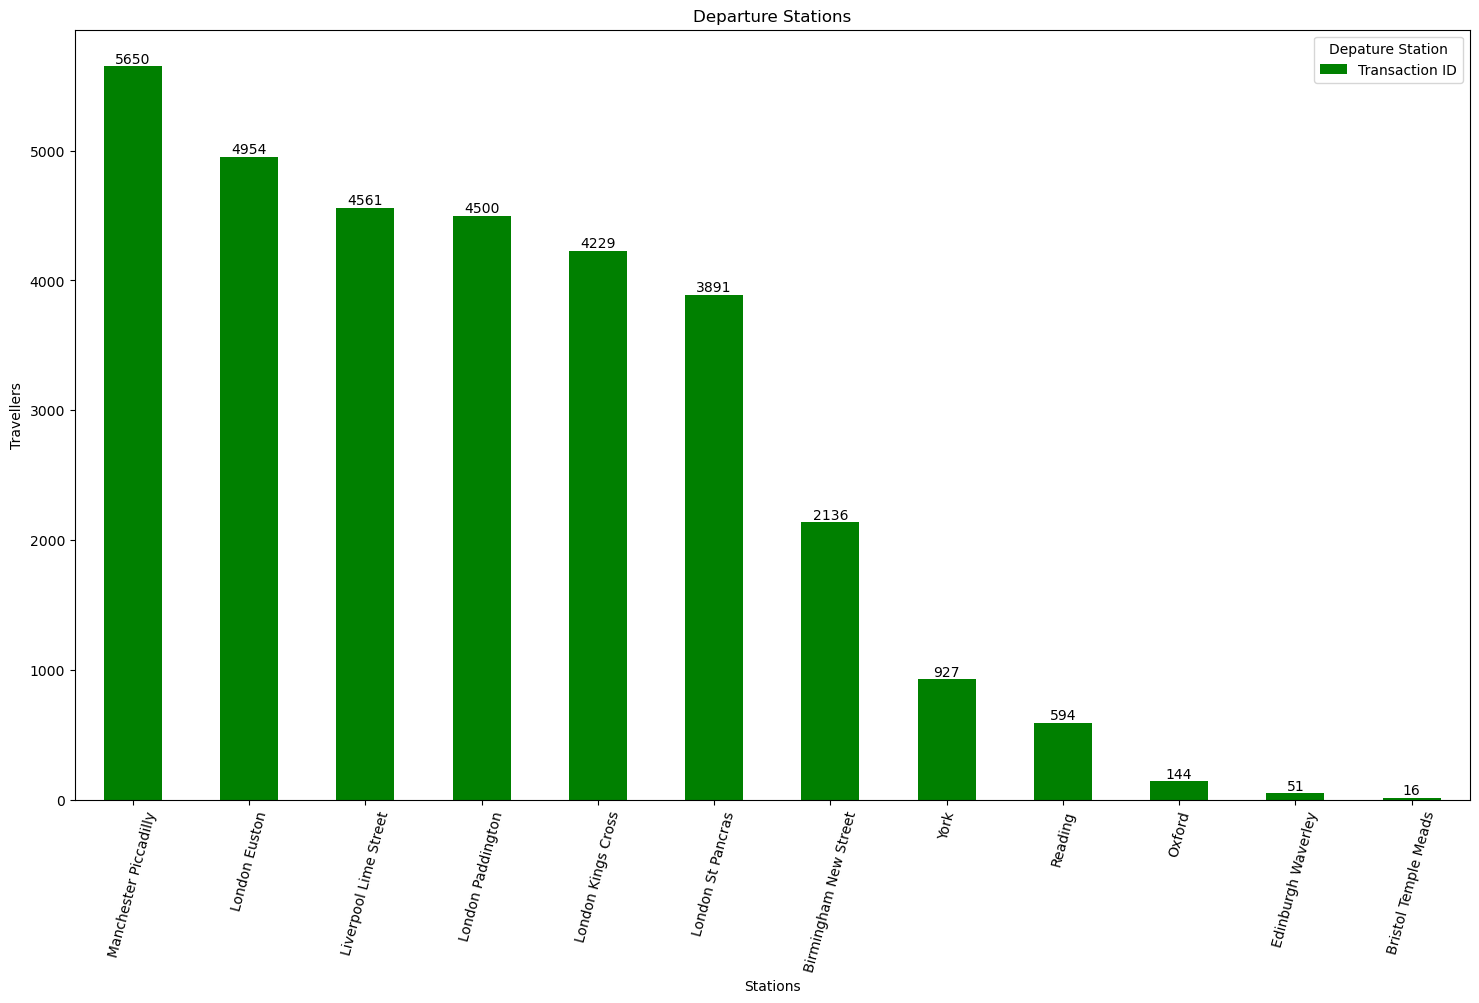

In [60]:
v4 = pd.pivot_table(railway,
               index = 'Departure Station', 
               values = 'Transaction ID',
               aggfunc = 'count'
              )


# sort values in descending order
v4 = v4.sort_values(by='Transaction ID', ascending=False)

# creating bar chart
v4_1 = v4.plot(kind = 'bar', figsize = (18,10), color = 'g')

# adding a number to each bar
for container in v4_1.containers:
    v4_1.bar_label(container, fmt = '%d') 

# chart details 
plt.title('Departure Stations')
plt.ylabel('Travellers')
plt.xlabel('Stations')
plt.xticks(rotation=75)
plt.legend(title='Depature Station')
plt.show() 

The data indicates that **Manchester Piccadilly** was the most frequently used station by travellers, with a total of **5,650 passengers**. However, when aggregating all **London stations** (London Euston, London Paddington, London Kings Cross, and London St Pancras) into a single category, **London becomes the most used location overall, with a total of 22,528 travellers** but **Manchester Piccadilly** stands out as the busiest single station. In contrast, **Bristol Temple Meads** recorded the lowest number of travellers, with just 16 passengers, suggesting significantly lower demand at that station.

Visual Five

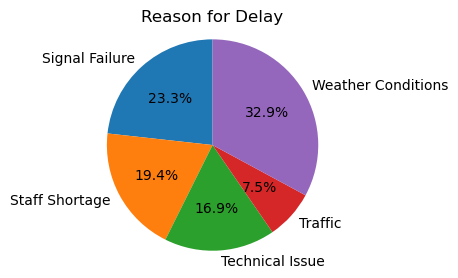

In [63]:
# reasons for delay
v5 = pd.pivot_table(no_delay_railway, 
               index = 'Reason for Delay',
               values = 'Transaction ID',
               aggfunc = 'count'
              )

# extracting values and labels 
values = v5['Transaction ID']
labels = v5.index

# creating pie chart 
plt.figure(figsize = (3,3))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90)

# chart details
plt.title('Reason for Delay')
plt.axis('equal')
plt.show()

The data reveals that there are **five main reasons for travel delays**, with **Weather Conditions being the leading cause**, accounting for **32.9%** of all delays. The second most common reason is **signal failure, responsible for 23.3% of delays**. In contrast, **traffic is the least significant factor, contributing to only 7.5% of delays**.

Visual Six

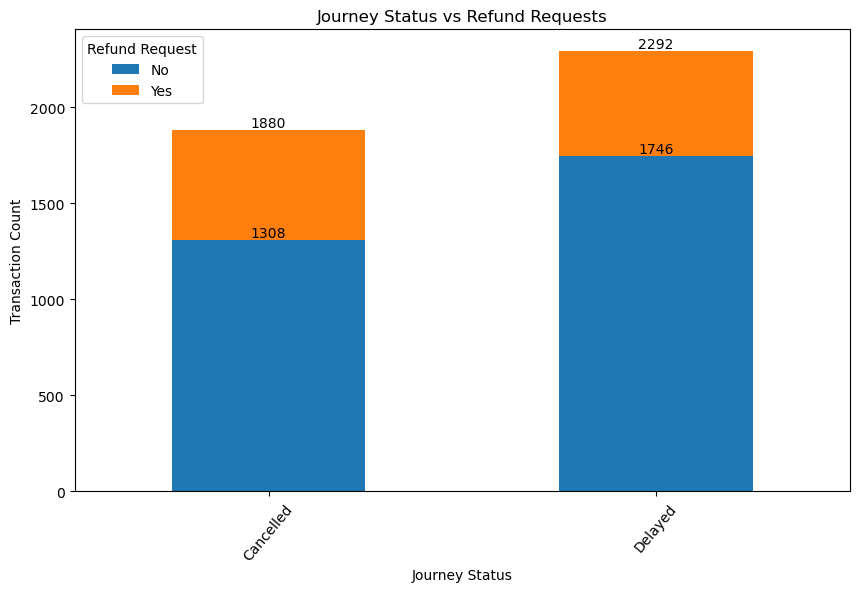

In [66]:
# journey status and refund request 
v6 = pd.pivot_table(
    without_on_time,
    index='Journey Status',
    values='Transaction ID',
    columns='Refund Request',
    aggfunc='count',
    fill_value=0
)

# plot the stacked bar chart
v6_1 = v6.plot(kind='bar', stacked=True, figsize=(10, 6))

# adding labels to each segment of the bar
for container in v6_1.containers:
    v6_1.bar_label(container, fmt='%d')  

# chart details
plt.title('Journey Status vs Refund Requests')
plt.ylabel('Transaction Count')
plt.xlabel('Journey Status')
plt.xticks(rotation=50)
plt.legend(title='Refund Request')
plt.show()

The data indicates that **refund requests are influenced by the journey status**, particularly whether a train was **cancelled or delayed**.

1. **Cancelled Trains:**
- A total of **3,188** train journeys were cancelled.
- **1,880 travellers (59%)** requested a refund, while **1,308 (41%)** did not or are still waiting to request one.

2. **Delayed Trains:**
- A total of **4,038** trains were delayed.
- **2,292 travellers (56.8%)** requested a refund, while **1,746 (43.2%)** did not or are still pending.

Additionally, the majority of trains **were not impacted by delays or cancellations**, as **only 4,038 out of 31,653 train journeys (12.8%) experienced delays**, meaning **27,615 trains (87.2%) arrived on time**.
While delays are more common than cancellations, refund request rates are similar for both scenarios **(57-59%)**. This suggests that travellers seek compensation in both cases but may perceive delays differently depending on their severity.

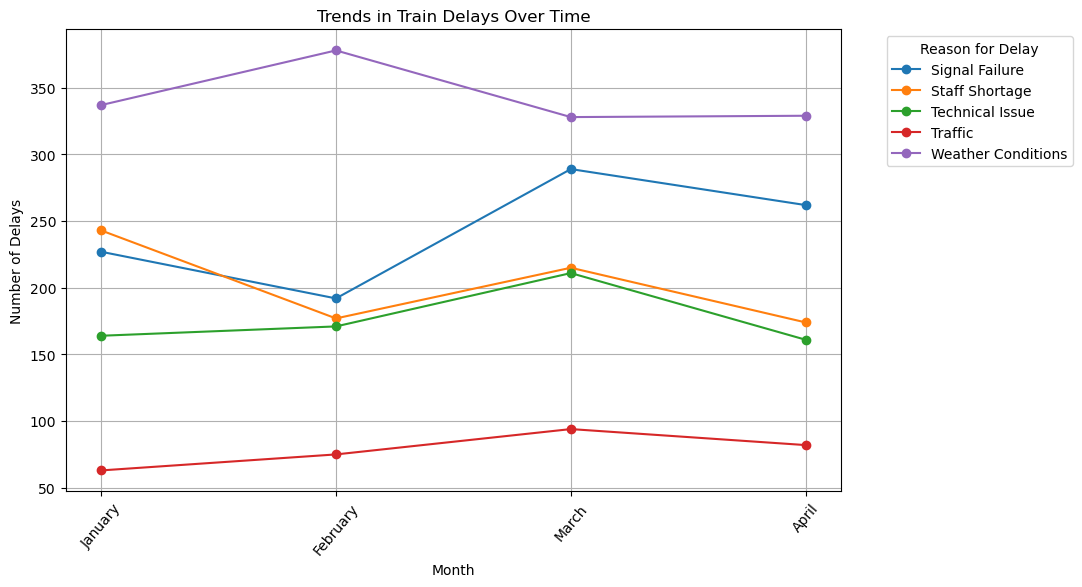

In [68]:
# train delays over time
v7 = pd.pivot_table(
    no_delay_railway,
    index='Reason for Delay',
    values='Transaction ID',
    columns='Month',
    aggfunc='count',
    fill_value=0
)

#order of months
month_order = ['January', 'February', 'March', 'April']  # Add more months if needed

# columns are sorted in order
v7 = v7.reindex(columns=month_order)

# plot line chart
plt.figure(figsize=(10, 6))
for reason in v7.index:
    plt.plot(v7.columns, v7.loc[reason], marker='o', label=reason)

# chart details
plt.title('Trends in Train Delays Over Time')
plt.ylabel('Number of Delays')
plt.xlabel('Month')
plt.xticks(rotation=50)
plt.legend(title='Reason for Delay', bbox_to_anchor=(1.05, 1), loc='upper left')  # Puts legend outside for clarity
plt.grid(True)
plt.show()

Looking at this visual data: it shows the trends in train delay over the first four months.

1. **January**:
- **Weather conditions** caused the most **delays (337)**.
- **Staff shortages** were the second highest (**243)**, followed by **signal failure (227)**.
- **Technical issues** resulted in **164 delays**.
- **Traffic** had the least impact with only **63 delays**.

2. **February**:
- **Weather-related delays** increased to their highest level **(378)**.
- **Signal failure** moved up to second place **(192)**, pushing **staff shortages** down to third **(177)**.
- **Technical issues** rose slightly **(171)**, while **traffic delays** remained the lowest **(75)**.

3. **March**:
- **Weather conditions still led to delays (328)**, though slightly lower than in February.
- **Signal failure spiked significantly (289**, making it the second biggest issue.
- **Staff shortages peaked at their highest (215)**, while **technical issues** also hit their highest at **211**.
- **Traffic saw its highest count so far (94)** but remained the least impactful.

4. **April**:
- **Weather conditions remained the biggest issue (329)**, with little change from March.
- **Signal failure remained a major issue**, though it dropped to **262**.
- **Staff shortages decreased to 174**, and **technical issues** dropped to **161**.
- **Traffic delays slightly declined to 82**, keeping it the least significant delay factor.
  
----

**Additional insight**

- **Weather conditions were the leading cause of delays** in all four months, with **February having the highest count (378)**.
 
- **Traffic was the least significant** cause of delays, even though it saw its highest peak in **March (94 delays)**.
  
- **Staff shortages fluctuated**, reaching their peak in **March (215 delays)** but dropping in April.

- **Signal failure** experienced an unexpected surge in **March (289 delays)**, before declining in April.

- **Technical issues** increased steadily until **March (211 delays)** before declining. 

---

**Conclusion**

**Based on the data and insights derived, we can identify key trends and patterns that inform strategic decisions:**

- Two-thirds (66.1%) of customers do not use a railcard.

- Online ticket purchases **outnumber station purchases by 41%**, indicating a shift towards digital convenience.

- Over **60% of transactions are made via credit card**, while contactless payments are growing but remain lower, and debit cards are the least used.

- Standard class is the dominant choice, reflecting its **price sensitivity**, while first-class has lower demand.

- Anytime tickets are the **least purchased** due to high costs.

- **London stations** collectively dominate travel, while **Manchester Piccadilly** is the busiest single station, and **Bristol Temple Meads** has minimal usage.

- Weather-related delays are the most frequent **(32.9%)**, while traffic has the least impact **(7.5%)**.

- **41-43% of eligible travelers** do not request refunds, possibly due to lack of awareness or complex processes.



---